In [315]:
# Libraries
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Scrape For Bull Run 1971-74

### Scrape 1971

In [316]:
# Collecting and parsing a webpage
url='https://sdbullion.com/silver-prices-1971'
# make a get request to fetch html
html_content = requests.get(url).text

#parse the html content 
soup = BeautifulSoup(html_content, 'lxml')
#print(soup.prettify())

table = soup.find('table')
#silver_price = table.tbody.find_all('td')
#print(silver_price)
p_span = table.find_all('p')

spans = []
for span in p_span:
    spans.append(span.text)
    
#print(spans[314])
spans_august = spans[0:314]
#print(spans_august)

# loops through spans and splits at index to extract Dollar from list and appends to a new values list.

silver_values_august = []
for i in spans_august[1::2]:
    silver_values_august.append(i)
#print(silver_values_august[1:])

spans_september = spans[321:-16]
silver_values_september = []
for i in spans_september[1::2]:
    silver_values_september.append(i)
#print(silver_values_september)

spans_december = spans[-16:]
silver_values_december = []
for i in spans_december[1::2]:
    silver_values_december.append(i)
#print(silver_values_december)

# Merge lists into 1 year

silver_price = silver_values_august[1:] + silver_values_september + silver_values_december
print(silver_price) # missing 6 days of data 

['$1.65 oz', '$1.65 oz', '$1.65 oz', '$1.69 oz', '$1.69 oz', '$1.71 oz', '$1.70 oz', '$1.70 oz', '$1.68 oz', '$1.68 oz', '$1.63 oz', '$1.59 oz', '$1.58 oz', '$1.58 oz', '$1.56 oz', '$1.59 oz', '$1.61 oz', '$1.56 oz', '$1.59 oz', '$1.59 oz', '$1.59 oz', '$1.61 oz', '$1.62 oz', '$1.62 oz', '$1.61 oz', '$1.61 oz', '$1.58 oz', '$1.58 oz', '$1.59 oz', '$1.59 oz', '$1.58 oz', '$1.58 oz', '$1.59 oz', '$1.60 oz', '$1.60 oz', '$1.60 oz', '$1.60 oz', '$1.59 oz', '$1.58 oz', '$1.59 oz', '$1.60 oz', '$1.63 oz', '$1.61 oz', '$1.62 oz', '$1.64 oz', '$1.66 oz', '$1.66 oz', '$1.67 oz', '$1.66 oz', '$1.66 oz', '$1.66 oz', '$1.68 oz', '$1.68 oz', '$1.67 oz', '$1.67 oz', '$1.67 oz', '$1.68 oz', '$1.66 oz', '$1.66 oz', '$1.69 oz', '$1.69 oz', '$1.69 oz', '$1.69 oz', '$1.71 oz', '$1.71 oz', '$1.74 oz', '$1.73 oz', '$1.74 oz', '$1.75 oz', '$1.75 oz', '$1.73 oz', '$1.73 oz', '$1.71 oz', '$1.71 oz', '$1.73 oz', '$1.74 oz', '$1.74 oz', '$1.72 oz', '$1.72 oz', '$1.67 oz', '$1.69 oz', '$1.70 oz', '$1.69 oz', '$1

In [317]:
# removes dollar and oz values
silver_price_1971 = []
for string in silver_price[1:]:
    silver_value = string.replace('$', '')
    silver_price_1971.append(silver_value[:-3])
    
print(silver_price_1971)

['1.65', '1.65', '1.69', '1.69', '1.71', '1.70', '1.70', '1.68', '1.68', '1.63', '1.59', '1.58', '1.58', '1.56', '1.59', '1.61', '1.56', '1.59', '1.59', '1.59', '1.61', '1.62', '1.62', '1.61', '1.61', '1.58', '1.58', '1.59', '1.59', '1.58', '1.58', '1.59', '1.60', '1.60', '1.60', '1.60', '1.59', '1.58', '1.59', '1.60', '1.63', '1.61', '1.62', '1.64', '1.66', '1.66', '1.67', '1.66', '1.66', '1.66', '1.68', '1.68', '1.67', '1.67', '1.67', '1.68', '1.66', '1.66', '1.69', '1.69', '1.69', '1.69', '1.71', '1.71', '1.74', '1.73', '1.74', '1.75', '1.75', '1.73', '1.73', '1.71', '1.71', '1.73', '1.74', '1.74', '1.72', '1.72', '1.67', '1.69', '1.70', '1.69', '1.68', '1.66', '1.69', '1.69', '1.69', '1.67', '1.68', '1.67', '1.68', '1.70', '1.68', '1.68', '1.68', '1.67', '1.66', '1.61', '1.64', '1.61', '1.60', '1.60', '1.61', '1.59', '1.59', '1.59', '1.59', '1.58', '1.63', '1.61', '1.61', '1.62', '1.62', '1.63', '1.64', '1.63', '1.61', '1.58', '1.60', '1.59', '1.60', '1.60', '1.58', '1.58', '1.60',

Extract Dates for 1971

In [318]:
#print(spans[314])
spans_august_date = spans[2:316]
#print(spans_august_date)

# loops through spans and splits at index5to extract Dollar from list and appends to a new values list.

silver_values_august_date = []
for i in spans_august_date[0::2]:
    silver_values_august_date.append(i)
#print(silver_values_august_date[1:])

spans_september_date = spans[321:-17]
silver_values_september_date = []
for i in spans_september_date[0::2]:
    silver_values_september_date.append(i)
#print(silver_values_september_date)

spans_december_date = spans[-16:]
silver_values_december_date = []
for i in spans_december_date[0::2]:
    silver_values_december_date.append(i)
#print(silver_values_december_date)

silver_list  = silver_values_august_date + silver_values_september_date + silver_values_december_date
#print(silver_list)

silver_1971 = []
for string in silver_list[1:]:
    silver_day = string.replace(',', '')
    silver_1971.append(silver_day)
    
#print(silver_1971)

Merge Dataframes 1971

In [319]:
# Merge Dataframes, Learn how to fill in missing data points

# Set price as Float, concat df's, reset_index to date, rename columns, convery to datetime.

silver_1971 = pd.DataFrame(silver_1971)
silver_price_1971 = pd.DataFrame(silver_price_1971, dtype='float')

silver_1971 = pd.concat([silver_1971, silver_price_1971], axis=1).reset_index(drop=True)
silver_1971.columns = ['Date', 'Price']
silver_1971 = silver_1971.set_index('Date')
silver_1971.index = pd.to_datetime(silver_1971.index)
silver_1971

,Price
Date,
1971-01-05,1.65
1971-01-06,1.65
1971-01-07,1.69
1971-01-08,1.69
1971-01-11,1.71
1971-01-12,1.70
1971-01-13,1.70
1971-01-14,1.68
1971-01-15,1.68


In [320]:
silver_1971.loc['1971-01-05']
silver_1971.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 1971-01-05 to 1971-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   247 non-null    float64
dtypes: float64(1)
memory usage: 12.0 KB


Fix Missing Values

In [321]:
# Average of previous 2 days fills missing number

In [322]:
# Fill in Datetimes 
# august 16th - 20th
# december 20th

silver_1971.loc[pd.to_datetime('1971-08-16')] = (silver_1971.loc['1971-08-12']['Price'] + silver_1971.loc['1971-08-13']['Price']) /2
silver_1971.loc[pd.to_datetime('1971-08-17')] = (silver_1971.loc['1971-08-13']['Price'] + silver_1971.loc['1971-08-16']['Price']) /2
silver_1971.loc[pd.to_datetime('1971-08-18')] = (silver_1971.loc['1971-08-16']['Price'] + silver_1971.loc['1971-08-17']['Price']) /2
silver_1971.loc[pd.to_datetime('1971-08-19')] = (silver_1971.loc['1971-08-17']['Price'] + silver_1971.loc['1971-08-18']['Price']) /2
silver_1971.loc[pd.to_datetime('1971-08-20')] = (silver_1971.loc['1971-08-18']['Price'] + silver_1971.loc['1971-08-19']['Price']) /2
silver_1971.loc[pd.to_datetime('1971-12-20')] = (silver_1971.loc['1971-12-16']['Price'] + silver_1971.loc['1971-08-17']['Price']) /2
silver_1971.loc[pd.to_datetime('1971-12-31')] = (silver_1971.loc['1971-12-29']['Price'] + silver_1971.loc['1971-12-30']['Price']) /2

print(silver_1971.loc[pd.to_datetime('1971-08-16')])
silver_1971 = silver_1971.sort_index()

#print(silver_1971)

Price    1.59
Name: 1971-08-16 00:00:00, dtype: float64


Text(0.5, 1.0, 'Silver Price 1971')

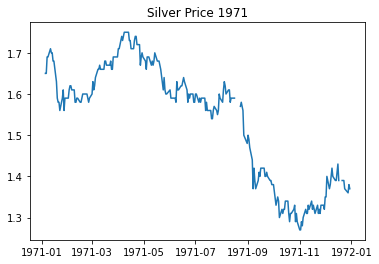

In [323]:
plt.plot(silver_1971)
plt.title('Silver Price 1971')


### Scrape 1972

In [324]:
# Collecting and parsing a webpage
url='https://sdbullion.com/silver-prices-1972'
# make a get request to fetch html
html_content = requests.get(url).text

#parse the html content 
soup = BeautifulSoup(html_content, 'lxml')
#print(soup.prettify())

table = soup.find('table')
#silver_price = table.tbody.find_all('td')
#print(silver_price)
p_span = table.find_all('p')

spans = []
for span in p_span:
    spans.append(span.text)



#### Extract Silver Values 1972

In [325]:
#print(spans[314])
spans_1972_june = spans[0:244]
#print(spans_1972_june)
# loops through spans and splits at index to extract Dollar from list and appends to a new values list.

silver_values_1972_june = []
for i in spans_1972_june[1::2]:
    silver_values_1972_june.append(i)
#print(silver_values_1972_june[1:])

spans_1972_december = spans[244:]

silver_values_1972_december = []
for i in spans_1972_december[1::2]:
    silver_values_1972_december.append(i)
#print(silver_values_1972_december) #[1:])

silver_values_1972 = silver_values_1972_june + silver_values_1972_december[1:]
#print(silver_values_1972)

# removes dollar and oz values
silver_price_1972 = []
for string in silver_values_1972[1:]:
    silver_value = string.replace('$', '')
    silver_price_1972.append(silver_value[:-3])
    
print(len(silver_price_1972))


252


#### Extract Dates 1972

In [326]:
spans_june_1972 = spans[0:244]
#print(spans_june_1972)

silver_values_june_date_1972 = []
for i in spans_june_1972[0::2]:
    silver_values_june_date_1972.append(i)
#print(silver_values_june_date_1972[1:])

silver_values_december_date_1972 = spans[244:]

silver_december_date_1972 = []
for i in silver_values_december_date_1972[0::2]:
    silver_december_date_1972.append(i)

silver_dates_1972 = silver_values_june_date_1972[1:] + silver_december_date_1972
print(len(silver_dates_1972))

253


Merge Dataframes 1972 

In [327]:
silver_1972 = pd.DataFrame(silver_dates_1972)
silver_price_1972 = pd.DataFrame(silver_price_1972 , dtype='float') # wont plot without float as type
silver_1972 = pd.concat([silver_1972, silver_price_1972], axis=1).reset_index(drop=True)
silver_1972.columns = ['Date', 'Price']
silver_1972 = silver_1972.set_index('Date')
silver_1972.index = pd.to_datetime(silver_1972.index)
pd.set_option('display.max_rows', 253)


# Fix missing value at 29th December @ 2.03 oz 
silver_1972.loc['1972-12-29'] = 2.03
print(silver_1972)


            Price
Date             
1972-01-03   1.37
1972-01-04   1.39
1972-01-05   1.42
1972-01-06   1.41
1972-01-07   1.44
1972-01-10   1.44
1972-01-11   1.48
1972-01-12   1.46
1972-01-13   1.47
1972-01-14   1.45
1972-01-17   1.50
1972-01-18   1.50
1972-01-19   1.51
1972-01-20   1.49
1972-01-21   1.49
1972-01-24   1.49
1972-01-25   1.46
1972-01-26   1.46
1972-01-27   1.47
1972-01-28   1.52
1972-01-31   1.50
1972-02-01   1.53
1972-02-02   1.55
1972-02-03   1.52
1972-02-04   1.52
1972-02-07   1.54
1972-02-08   1.53
1972-02-09   1.52
1972-02-10   1.53
1972-02-11   1.53
1972-02-14   1.49
1972-02-15   1.49
1972-02-16   1.49
1972-02-17   1.50
1972-02-18   1.50
1972-02-21   1.49
1972-02-22   1.50
1972-02-23   1.48
1972-02-24   1.48
1972-02-25   1.49
1972-02-28   1.47
1972-02-29   1.47
1972-03-01   1.48
1972-03-02   1.50
1972-03-03   1.50
1972-03-06   1.52
1972-03-07   1.54
1972-03-08   1.53
1972-03-09   1.54
1972-03-10   1.54
1972-03-13   1.54
1972-03-14   1.54
1972-03-15   1.52
1972-03-16

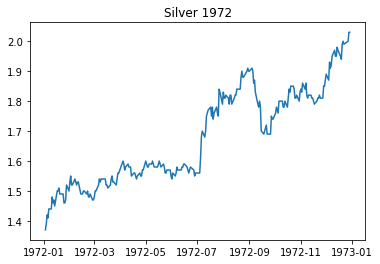

In [328]:
plt.plot(silver_1972)
plt.title('Silver 1972')
plt.show()

### Scrape 1973

In [329]:
# Collecting and parsing a webpage
url='https://sdbullion.com/silver-prices-1973'
# make a get request to fetch html
html_content = requests.get(url).text

#parse the html content 
soup = BeautifulSoup(html_content, 'lxml')
#print(soup.prettify())

table = soup.find('table')
#silver_price = table.tbody.find_all('td')
#print(silver_price)
p_span = table.find_all('p')

spans_1973 = []
for span in p_span:
    spans_1973.append(span.text)


#### Extract Silver Values 1973

In [330]:
spans_1973_january = spans_1973[0:60]
#print(spans_1972_june)
# loops through spans and splits at index to extract Dollar from list and appends to a new values list.
# insert dates 12, 13 feb
#print(spans_1972_january)

spans_1973_march = spans_1973[62:86]
#print(spans_1972_march)
# insert dates 2nd, 5th, 6th, 7th, 8th, 9th

spans_1973_december = spans_1973[92:]
#spans_1972_december

In [331]:
silver_values_1973_january = []
for i in spans_1973_january[1::2]:
    silver_values_1973_january.append(i)
#print(silver_values_1972_june[1:])

silver_values_1973_march = []
for i in spans_1973_march[1::2]:
    silver_values_1973_march.append(i)
#print(silver_values_1973_march) #[1:])

silver_values_1973_december = []
for i in spans_1973_december[1::2]:
    silver_values_1973_december.append(i)
#print(silver_values_1973_december) #[1:])

silver_values_1973 = silver_values_1973_january[1:] + silver_values_1973_march + silver_values_1973_december
#print(len(silver_values_1973))

# removes dollar and oz values
silver_price_1973 = []
for string in silver_values_1973:
    silver_value = string.replace('$', '')
    silver_price_1973.append(silver_value[:-3])
    
print(len(silver_price_1973))

245


#### Extract Dates 

In [332]:
silver_january_date_1973 = []
for i in spans_1973_january[0::2]:
    silver_january_date_1973.append(i)
#print(silver_january_date_1973)

silver_march_date_1973 = []
for i in spans_1973_march[0::2]:
    silver_march_date_1973.append(i)
#print(silver_march_date_1973)

silver_december_date_1973 = []
for i in spans_1973_december[0::2]:
    silver_december_date_1973.append(i)
#print(silver_december_date_1973)

silver_dates_1973 = silver_january_date_1973[1:] + silver_march_date_1973 + silver_december_date_1973
#print(silver_dates_1973)

silver_dates_1973

['January 2, 1973',
 'January 3, 1973',
 'January 4, 1973',
 'January 5, 1973',
 'January 8, 1973',
 'January 9, 1973',
 'January 10, 1973',
 'January 11, 1973',
 'January 12, 1973',
 'January 15, 1973',
 'January 16, 1973',
 'January 17, 1973',
 'January 18, 1973',
 'January 19, 1973',
 'January 22, 1973',
 'January 23, 1973',
 'January 24, 1973',
 'January 25, 1973',
 'January 26, 1973',
 'January 29, 1973',
 'January 30, 1973',
 'January 31, 1973',
 'February 1, 1973',
 'February 2, 1973',
 'February 5, 1973',
 'February 6, 1973',
 'February 7, 1973',
 'February 8, 1973',
 'February 9, 1973',
 'February 14, 1973',
 'February 15, 1973',
 'February 16, 1973',
 'February 19, 1973',
 'February 20, 1973',
 'February 21, 1973',
 'February 22, 1973',
 'February 23, 1973',
 'February 26, 1973',
 'February 27, 1973',
 'February 28, 1973',
 'March 1, 1973',
 'March 12, 1973',
 'March 13, 1973',
 'March 14, 1973',
 'March 15, 1973',
 'March 16, 1973',
 'March 19, 1973',
 'March 20, 1973',
 'Ma

#### Merge Into Dataframe 1973

In [333]:
silver_1973 = pd.DataFrame(silver_dates_1973)
silver_price_1973 = pd.DataFrame(silver_price_1973, dtype='float') # wont plot without float as type
silver_1973 = pd.concat([silver_1973, silver_price_1973], axis=1).reset_index(drop=True)
silver_1973.columns = ['Date', 'Price']
silver_1973 = silver_1973.set_index('Date')
#silver_1973.index = pd.to_datetime(silver_1973.index)
pd.set_option('display.max_rows', 253)
silver_1973

,Price
Date,
"January 2, 1973",2.04
"January 3, 1973",2.01
"January 4, 1973",2.05
"January 5, 1973",2.03
"January 8, 1973",1.98
"January 9, 1973",2.01
"January 10, 1973",1.98
"January 11, 1973",2.01
"January 12, 1973",2.01


#### Insert missing dates, covert to datetime after filling in peices datapoints

In [334]:
silver_1973.loc['February 12, 1973'] = (silver_1973.loc['February 9, 1973']['Price'] + silver_1973.loc['February 14, 1973']['Price']) /2 
silver_1973.loc['February 13, 1973'] = (silver_1973.loc['February 12, 1973']['Price'] + silver_1973.loc['February 14, 1973']['Price']) /2

silver_1973.loc['March 2, 1973'] = (silver_1973.loc['March 1, 1973']['Price'] + silver_1973.loc['March 12, 1973']['Price']) /2 
silver_1973.loc['March 5, 1973'] = (silver_1973.loc['March 2, 1973']['Price'] + silver_1973.loc['March 12, 1973']['Price']) /2 
silver_1973.loc['March 9, 1973'] = (silver_1973.loc['March 5, 1973']['Price'] + silver_1973.loc['March 12, 1973']['Price']) /2 
silver_1973.loc['March 8, 1973'] = (silver_1973.loc['March 5, 1973']['Price'] + silver_1973.loc['March 9, 1973']['Price']) /2 
silver_1973.loc['March 6, 1973'] = (silver_1973.loc['March 5, 1973']['Price'] + silver_1973.loc['March 8, 1973']['Price']) /2 
silver_1973.loc['March 7, 1973'] = (silver_1973.loc['March 6, 1973']['Price'] + silver_1973.loc['March 8, 1973']['Price']) /2 

silver_1973.index = pd.to_datetime(silver_1973.index)
silver_1973.sort_index()

,Price
Date,
1973-01-02,2.040000
1973-01-03,2.010000
1973-01-04,2.050000
1973-01-05,2.030000
1973-01-08,1.980000
1973-01-09,2.010000
1973-01-10,1.980000
1973-01-11,2.010000
1973-01-12,2.010000


Text(0.5, 1.0, 'Silver 1973')

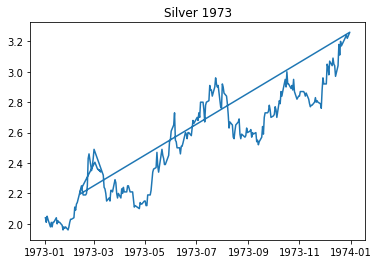

In [335]:
plt.plot(silver_1973)
plt.title('Silver 1973')

### Scrape 1974 

In [336]:
# No missing Data!! Whoop Whoop

# Collecting and parsing a webpage
url='https://sdbullion.com/silver-prices-1974'
# make a get request to fetch html
html_content = requests.get(url).text

#parse the html content 
soup = BeautifulSoup(html_content, 'lxml')
#print(soup.prettify())

table = soup.find('table')
#silver_price = table.tbody.find_all('td')
#print(silver_price)
p_span = table.find_all('p')

spans_1974 = []
for span in p_span:
    spans_1974.append(span.text)

print(spans_1974)

['Date', 'Silver price in US dollars per ounce', 'January 2, 1974', '$3.28 oz', 'January 3, 1974', '$3.33 oz', 'January 4, 1974', '$3.27 oz', 'January 7, 1974', '$3.27 oz', 'January 8, 1974', '$3.34 oz', 'January 9, 1974', '$3.33 oz', 'January 10, 1974', '$3.30 oz', 'January 11, 1974', '$3.34 oz', 'January 14, 1974', '$3.34 oz', 'January 15, 1974', '$3.51 oz', 'January 16, 1974', '$3.45 oz', 'January 17, 1974', '$3.64 oz', 'January 18, 1974', '$3.63 oz', 'January 21, 1974', '$3.93 oz', 'January 22, 1974', '$3.90 oz', 'January 23, 1974', '$3.72 oz', 'January 24, 1974', '$3.80 oz', 'January 25, 1974', '$3.91 oz', 'January 28, 1974', '$4.02 oz', 'January 29, 1974', '$3.97 oz', 'January 30, 1974', '$3.91 oz', 'January 31, 1974', '$3.87 oz', 'February 1, 1974', '$4.04 oz', 'February 4, 1974', '$4.21 oz', 'February 5, 1974', '$4.35 oz', 'February 6, 1974', '$4.39 oz', 'February 7, 1974', '$4.57 oz', 'February 8, 1974', '$4.75 oz', 'February 11, 1974', '$5.15 oz', 'February 12, 1974', '$5.54 

#### Extract Values 1974

In [337]:
silver_values_1974 = []
for i in spans_1974[1::2]:
    silver_values_1974.append(i)

#print(silver_values_1974[1:])

# removes dollar and oz values
silver_price_1974 = []
for string in silver_values_1974[1:]:
    silver_value = string.replace('$', '')
    silver_price_1974.append(silver_value[:-3])
    
print(silver_price_1974)

['3.28', '3.33', '3.27', '3.27', '3.34', '3.33', '3.30', '3.34', '3.34', '3.51', '3.45', '3.64', '3.63', '3.93', '3.90', '3.72', '3.80', '3.91', '4.02', '3.97', '3.91', '3.87', '4.04', '4.21', '4.35', '4.39', '4.57', '4.75', '5.15', '5.54', '5.19', '5.28', '5.59', '5.40', '5.13', '5.28', '5.75', '5.82', '5.96', '6.76', '6.46', '5.69', '5.73', '5.63', '5.21', '5.01', '5.29', '5.42', '5.02', '5.22', '5.30', '5.40', '5.28', '5.17', '5.62', '5.60', '5.55', '5.43', '5.60', '5.19', '5.17', '5.19', '5.35', '5.32', '5.15', '5.16', '5.17', '5.02', '4.41', '4.74', '4.72', '4.34', '4.58', '4.39', '4.67', '4.78', '5.12', '5.46', '5.28', '5.58', '5.43', '5.34', '5.62', '5.40', '5.43', '5.50', '5.45', '5.21', '5.24', '5.45', '5.46', '5.58', '6.02', '5.66', '5.77', '5.77', '5.61', '5.42', '5.43', '4.98', '5.22', '4.87', '4.62', '5.08', '4.92', '4.74', '4.70', '5.02', '4.95', '5.02', '5.20', '5.10', '4.79', '5.05', '5.02', '4.89', '4.87', '4.78', '4.68', '4.83', '4.73', '4.52', '4.57', '4.48', '4.61',

#### Extract Dates 1974

In [338]:
silver_dates_1974 = []
for i in spans_1974[0::2]:
    silver_dates_1974.append(i)
print(silver_dates_1974[1:])

['January 2, 1974', 'January 3, 1974', 'January 4, 1974', 'January 7, 1974', 'January 8, 1974', 'January 9, 1974', 'January 10, 1974', 'January 11, 1974', 'January 14, 1974', 'January 15, 1974', 'January 16, 1974', 'January 17, 1974', 'January 18, 1974', 'January 21, 1974', 'January 22, 1974', 'January 23, 1974', 'January 24, 1974', 'January 25, 1974', 'January 28, 1974', 'January 29, 1974', 'January 30, 1974', 'January 31, 1974', 'February 1, 1974', 'February 4, 1974', 'February 5, 1974', 'February 6, 1974', 'February 7, 1974', 'February 8, 1974', 'February 11, 1974', 'February 12, 1974', 'February 13, 1974', 'February 14, 1974', 'February 15, 1974', 'February 18, 1974', 'February 19, 1974', 'February 20, 1974', 'February 21, 1974', 'February 22, 1974', 'February 25, 1974', 'February 26, 1974', 'February 27, 1974', 'February 28, 1974', 'March 1, 1974', 'March 4, 1974', 'March 5, 1974', 'March 6, 1974', 'March 7, 1974', 'March 8, 1974', 'March 11, 1974', 'March 12, 1974', 'March 13, 19

### Merge and tidy dataframes

In [339]:
silver_1974 = pd.DataFrame(silver_dates_1974[1:])
silver_price_1974 = pd.DataFrame(silver_price_1974, dtype='float') # wont plot without float as type
silver_1974 = pd.concat([silver_1974, silver_price_1974], axis=1).reset_index(drop=True)
silver_1974.columns = ['Date', 'Price']
silver_1974 = silver_1974.set_index('Date')
silver_1974.index = pd.to_datetime(silver_1974.index)
pd.set_option('display.max_rows', 255)
silver_1974

,Price
Date,
1974-01-02,3.28
1974-01-03,3.33
1974-01-04,3.27
1974-01-07,3.27
1974-01-08,3.34
1974-01-09,3.33
1974-01-10,3.30
1974-01-11,3.34
1974-01-14,3.34


Text(0.5, 1.0, 'Silver 1974')

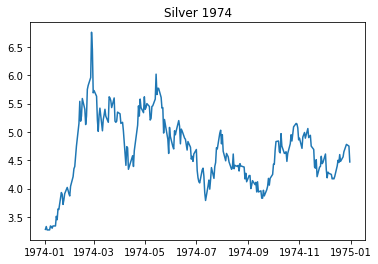

In [340]:
plt.plot(silver_1974)
plt.title('Silver 1974')

## Convert price signals to log change, create average dataframe based on 4 dataframes, then plot the average movement over the year.


In [341]:
# Dataframes to work with 
silver_1971['Log Change 71']= np.log(silver_1971['Price'])
print(silver_1971)
silver_1972['Log Change 72'] = np.log(silver_1972['Price'])
print(silver_1972)
silver_1973['Log Change 73'] = np.log(silver_1973['Price'])
print(silver_1973)
silver_1974['Log Change 74'] = np.log(silver_1974['Price'])
print(silver_1974)

            Price  Log Change 71
Date                            
1971-01-05   1.65       0.500775
1971-01-06   1.65       0.500775
1971-01-07   1.69       0.524729
1971-01-08   1.69       0.524729
1971-01-11   1.71       0.536493
1971-01-12   1.70       0.530628
1971-01-13   1.70       0.530628
1971-01-14   1.68       0.518794
1971-01-15   1.68       0.518794
1971-01-18   1.63       0.488580
1971-01-19   1.59       0.463734
1971-01-20   1.58       0.457425
1971-01-21   1.58       0.457425
1971-01-22   1.56       0.444686
1971-01-25   1.59       0.463734
1971-01-26   1.61       0.476234
1971-01-27   1.56       0.444686
1971-01-28   1.59       0.463734
1971-01-29   1.59       0.463734
1971-02-01   1.59       0.463734
1971-02-02   1.61       0.476234
1971-02-03   1.62       0.482426
1971-02-04   1.62       0.482426
1971-02-05   1.61       0.476234
1971-02-08   1.61       0.476234
1971-02-09   1.58       0.457425
1971-02-10   1.58       0.457425
1971-02-11   1.59       0.463734
1971-02-12

In [345]:
# reset to merge dataframe on

silver_1971 = silver_1971.reset_index()
silver_1972 = silver_1972.reset_index()
silver_1973 = silver_1973.reset_index()
silver_1974 = silver_1974.reset_index()

# merge log change from silver_price df

#silver_log = pd.concat([silver_1971['Price'], silver_1972['Price']],axis=1)
#silver_log

#silver_1973 = pd.concat([silver_1973, silver_price_1973], axis=1).reset_index(drop=True)

#new_df = pd.merge(silver_1971['Price'], silver_1972['Price'],  how='left')
#new_df

silver_price_concat = pd.concat([silver_1971['Price'], silver_1972['Price'], silver_1973['Price'], silver_1974['Price']], axis=1).reset_index(drop=True)
silver_price_concat

silver_price_concat['Average'] = silver_price_concat.mean(numeric_only=True, axis=1)
silver_price_concat['Log Average'] = np.log(silver_price_concat['Average'])
silver_price_concat


,Price,Price,Price,Price,Average,Log Average
0,1.65,1.37,2.040000,3.28,2.085000,0.734769
1,1.65,1.39,2.010000,3.33,2.095000,0.739554
2,1.69,1.42,2.050000,3.27,2.107500,0.745502
3,1.69,1.41,2.030000,3.27,2.100000,0.741937
4,1.71,1.44,1.980000,3.34,2.117500,0.750236
5,1.70,1.44,2.010000,3.33,2.120000,0.751416
6,1.70,1.48,1.980000,3.30,2.115000,0.749055
7,1.68,1.46,2.010000,3.34,2.122500,0.752595
8,1.68,1.47,2.010000,3.34,2.125000,0.753772
9,1.63,1.45,2.040000,3.51,2.157500,0.768950


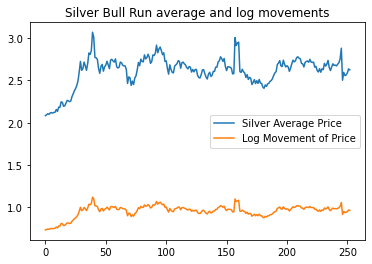

In [352]:
plt.plot(silver_price_concat['Average'][:-1], label='Silver Average Price') #silver_price_concat['Log Average'][:-1])
plt.plot(silver_price_concat['Log Average'][:-1], label='Log Movement of Price')
plt.title('Silver Bull Run average and log movements')
plt.legend()
plt.show()